In [1]:
import pandas as pd 
import requests
import json
import time
import numpy as np

In [300]:
# 获取永续合约价格
def get_perpetualprice(platform, symbol):
    if platform == 'huobi':
        now = int(time.time())
        start_time = now - 86400*250
        contract_code = "{}-usdt".format(symbol).upper()
        url = huobifuture_api_url + '/linear-swap-ex/market/history/kline?contract_code={}&period=1day&from={}&to={}'.format(
            contract_code, start_time, now)
        res = requests.get(url)
        resdict = json.loads(res.content.decode())
        close_price = [i['close'] for i in resdict['data']]
        high_price = [i['high'] for i in resdict['data']]
        low_price = [i['low'] for i in resdict['data']]
        open_price=[i['open'] for i in resdict['data']]
        return close_price,high_price,low_price,open_price
#     elif platform == "T8ex":
#         contract_id_dict = {'BTC': 1, 'ETH': 2, 'LINK': 3, 'EOS': 4, 'FIL': 5, 'LTC': 6, 'UNI': 7, 'DOT': 8, 'DOGE': 9}
#         contract_id = contract_id_dict[symbol.upper()]
#         now = int(time.time())
#         start_time = now - 300
#         url = "http://192.168.6.42/contract-market/history"
#         url = url + "?contractId={}&from={}&to={}&resolution={}".format(contract_id, start_time * 1000, now * 1000, 1)
#         res = requests.get(url).json()
#         if res:
#             close_price = res[-1][-2]
#             return close_price

In [385]:
huobifuture_api_url="https://api.btcgateway.pro"
close,high,low,open=get_perpetualprice('huobi','eth')

In [386]:
df=pd.DataFrame()

In [387]:
df['close']=close
df['high']=high
df['low']=low
df['open']=open

In [388]:
df

,close,high,low,open
0,413.03,422.93,408.43,415.43
1,412.43,417.74,401.51,412.88
2,405.62,419.97,403.20,414.60
3,394.22,412.95,391.95,405.58
4,406.13,406.80,381.13,393.70
...,...,...,...,...
246,1778.11,1868.56,1716.09,1825.20
247,1843.50,1893.80,1727.55,1778.10
248,2113.66,2116.00,1805.43,1843.50
249,2216.79,2235.00,2061.90,2113.66


In [389]:
print(len(close),len(high),len(low),len(open))

251 251 251 251


In [390]:
df

,close,high,low,open
0,413.03,422.93,408.43,415.43
1,412.43,417.74,401.51,412.88
2,405.62,419.97,403.20,414.60
3,394.22,412.95,391.95,405.58
4,406.13,406.80,381.13,393.70
...,...,...,...,...
246,1778.11,1868.56,1716.09,1825.20
247,1843.50,1893.80,1727.55,1778.10
248,2113.66,2116.00,1805.43,1843.50
249,2216.79,2235.00,2061.90,2113.66


In [391]:
N=2
df['HH']=df['high'].shift().rolling(N).max()
df['HC']=df['close'].shift().rolling(N).max()
df['LC']=df['close'].shift().rolling(N).min()
df['LL']=df['low'].shift().rolling(N).min()
df.fillna(0,inplace=True)

In [392]:
df['a']=df['HH']-df['LC']
df['b']=df['HC']-df['LL']

In [393]:
df['range']=df[['a','b']].max(axis=1)

In [394]:
df['upper_']=df['open']+0.2*df['range']

In [395]:
df['low_']=df['open']-1*df['range']

In [396]:
df['upper_']=df['upper_'].apply(lambda x:float(x))

In [397]:
df['position_open']=np.where(df['close']>df['upper_'],1,0)

In [398]:
df['position_close']=np.where(df['close']<df['low_'],-1,0)

In [399]:
df.drop(['a','b'],axis=1,inplace=True)

In [400]:
from pylab import mpl,plt
plt.style.use("seaborn")
mpl.rcParams['font.family']='serif'
%matplotlib inline

<AxesSubplot:>

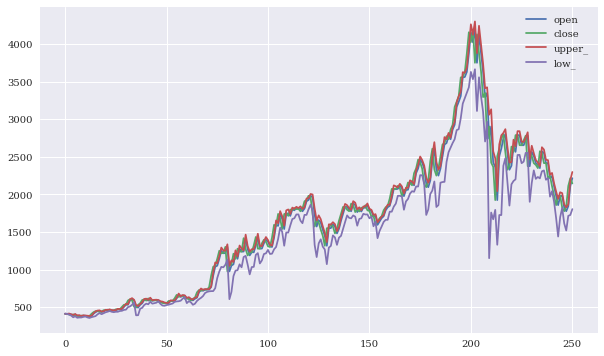

In [401]:
df[['open','close','upper_','low_']].plot(figsize=(10,6))

In [402]:
open=df['position_open'].values.tolist()
close=df['position_close'].values.tolist()


In [403]:
#单边做多
# flag=0
# direction=[]
# for i in range(len(open)):
#     if flag==0:
#         if open[i]==1 and close[i]==0:
#             direction.append(1)
#             flag=1
#         elif open[i]==0 and close[i]==-1:
#             direction.append(0)
#         else:
#             direction.append(0)
#     elif flag==1:
#         if open[i]==1 and close[i]==0: 
#             direction.append(1)
#         elif open[i]==0 and close[i]==-1:
#             direction.append(0)
#             flag=0
#         else:
#             direction.append(1)

In [404]:
#双向交易
flag=0
direction=[]
for i in range(len(open)):
    if flag==0:
        if open[i]==1 and close[i]==0:
            direction.append(1)
            flag=1
        elif open[i]==0 and close[i]==-1:
            direction.append(-1)
            flag=-1
        else:
            direction.append(0)
    elif flag==1:
        if open[i]==1 and close[i]==0: 
            direction.append(1)
        elif open[i]==0 and close[i]==-1:
            direction.append(0)
            flag=0
        else:
            direction.append(1)
    elif flag==-1:
        if open[i]==1 and close[i]==0:
            direction.append(0)
            flag=0
        elif open[i]==0 and close[i]==-1:
            direction.append(-1)
        else:
            direction.append(-1)
            
            
#双向交易
# flag=0
# direction=[]
# for i in range(len(open)):
#     if flag==0:
#         if open[i]==1 and close[i]==0:
#             direction.append(1)
#             flag=1
#         elif open[i]==0 and close[i]==-1:
#             direction.append(-1)
#             flag=-1
#         else:
#             direction.append(0)
#     elif flag==1:
#         if open[i]==1 and close[i]==0: 
#             direction.append(1)
#         elif open[i]==0 and close[i]==-1:
#             direction.append(-1)
#             flag=-1
#         else:
#             direction.append(1)
#     elif flag==-1:
#         if open[i]==1 and close[i]==0:
#             direction.append(1)
#             flag=0
#         elif open[i]==0 and close[i]==-1:
#             direction.append(-1)
#         else:
#             direction.append(-1)

In [405]:
df['direction']=np.array(direction)

In [406]:
df.head(40)

,close,high,low,open,HH,HC,LC,LL,range,upper_,low_,position_open,position_close,direction
0,413.03,422.93,408.43,415.43,0.00,0.00,0.00,0.00,0.00,415.430,415.43,0,-1,-1
1,412.43,417.74,401.51,412.88,0.00,0.00,0.00,0.00,0.00,412.880,412.88,0,-1,-1
2,405.62,419.97,403.20,414.60,422.93,413.03,412.43,401.51,11.52,416.904,403.08,0,0,-1
3,394.22,412.95,391.95,405.58,419.97,412.43,405.62,401.51,14.35,408.450,391.23,0,0,-1
4,406.13,406.80,381.13,393.70,419.97,405.62,394.22,391.95,25.75,398.850,367.95,1,0,0
5,387.58,412.93,379.90,406.32,412.95,406.13,394.22,381.13,25.00,411.320,381.32,0,0,0
6,390.17,392.63,380.94,387.51,412.93,406.13,387.58,379.90,26.23,392.756,361.28,0,0,0
7,381.67,393.65,373.10,390.48,412.93,390.17,387.58,379.90,25.35,395.550,365.13,0,0,0
8,390.38,394.63,379.96,381.87,393.65,390.17,381.67,373.10,17.07,385.284,364.80,1,0,1
9,388.54,391.24,384.10,390.25,394.63,390.38,381.67,373.10,17.28,393.706,372.97,0,0,1


In [407]:
df['return']=np.log(df['close']/df['close'].shift())

In [408]:
df['Strategy']=df['direction'].shift(1)*df['return']

In [409]:
np.exp(df[['return','Strategy']].sum())

return      5.197685
Strategy    5.546025
dtype: float64

<AxesSubplot:>

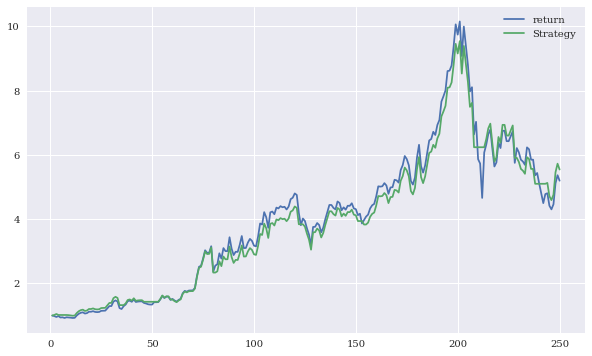

In [410]:
df[['return','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [ ]:
df.head(100)[['close','upper_','low_']].plot(figsize=(10,6))

In [ ]:
df.iloc[40:100,:]

# 均线

In [7]:
data=pd.read_excel("gec.xlsx")
df=data.copy()
df.columns=['time','open','high','low','close','amout','market_value']
df['close']=df['close'].apply(lambda x:float(x))
df['return']=np.log(df['close']/df['close'].shift())
# df['MA5']=df['close'].rolling(5).mean()
# df['MA25']=df['close'].rolling(25).mean()
# df['MA30']=df['close'].rolling(30).mean()
# df['MA80']=df['close'].rolling(80).mean()
# df['MA18']=df['close'].rolling(18).mean()
# df['MA21']=df['close'].rolling(21).mean()

In [8]:
df

,time,open,high,low,close,amout,market_value,return
0,2020-03-30,0.200200,0.200200,0.180600,0.180600,32.33万,--,NaN
1,2020-03-31,0.180500,0.196200,0.172100,0.191000,32.41万,--,0.055989
2,2020-04-01,0.189900,0.231900,0.189900,0.202200,34.60万,--,0.056984
3,2020-04-02,0.202200,0.208600,0.200200,0.201800,30.94万,--,-0.001980
4,2020-04-03,0.201800,0.206000,0.201700,0.202200,41.90万,--,0.001980
...,...,...,...,...,...,...,...,...
357,2021-03-25,0.139500,0.139600,0.089705,0.089705,139.87万,--,-0.441538
358,2021-03-26,0.089705,0.095827,0.089705,0.095827,150.53万,--,0.066018
359,2021-03-27,0.095827,0.099377,0.095827,0.099377,155.57万,--,0.036376
360,2021-03-28,0.099377,0.099377,0.097654,0.097654,125.90万,--,-0.017490


In [58]:
df['position']=np.where(df['MA18']>df['MA21'],1,-1)

In [59]:
df

,time,close,open,high,low,amout,change,return,MA5,MA25,MA30,MA80,MA18,MA21,position
0,40377,0.1,0.0,0.1,0.1,0.08K,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,40378,0.1,0.1,0.1,0.1,0.57K,0.0000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,40379,0.1,0.1,0.1,0.1,0.26K,0.0000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,40380,0.1,0.1,0.1,0.1,0.58K,0.0000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,40381,0.1,0.1,0.1,0.1,2.16K,0.0000,0.000000,0.10,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,44277,54158.3,57379.3,58379.9,53784.2,95.53K,-0.0562,-0.057851,57075.90,53540.360,53186.393333,44310.98625,55778.883333,54822.247619,1
3901,44278,54452.5,54117.5,55813.8,52992.3,84.84K,0.0054,0.005418,56435.20,53864.636,53087.016667,44589.22625,56093.327778,55109.309524,1
3902,44279,52325.4,54309.1,57169.4,51725.4,137.91K,-0.0391,-0.039847,55282.68,54112.184,53027.470000,44831.30750,56286.094444,55201.228571,1
3903,44280,51322.3,52330.0,53175.4,50441.3,143.35K,-0.0192,-0.019357,53928.46,54358.516,53107.840000,45072.55375,56304.983333,55339.052381,1


In [60]:
df['strategy_ma']=df['position'].shift(1)*df['return']

<AxesSubplot:>

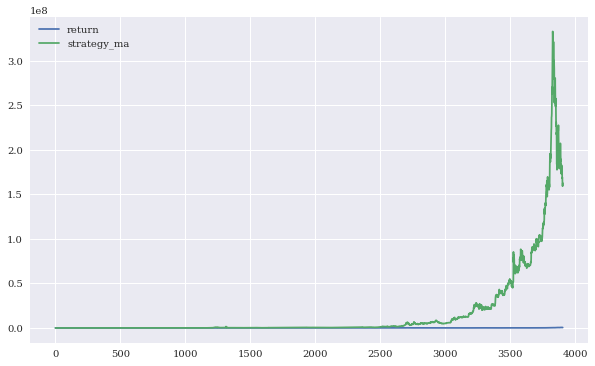

In [61]:
df[['return','strategy_ma']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [62]:
np.exp(df[['return','strategy_ma']].sum())

return         5.242850e+05
strategy_ma    1.626792e+08
dtype: float64

In [13]:
from itertools import product
sma1=range(0,60,5)
sma2=range(0,100,10)

In [17]:
data=pd.read_excel("gec.xlsx")
df=data.copy()
df.columns=['time','open','high','low','close','amout','market_value']

In [19]:
df['return']=np.log(df['close']/df['close'].shift())

In [21]:
np.exp(df[['return']].sum())

return    0.528887
dtype: float64

In [119]:
results=pd.DataFrame()
data=pd.read_excel("gec.xlsx")
for SMA1,SMA2 in product(sma1,sma2):
    df=data.copy()
    df.columns=['time','open','high','low','close','amout','market_value']
    df['return']=np.log(df['close']/df['close'].shift())
    df['SMA1']=df['close'].rolling(SMA1).mean()
    df['SMA2']=df['close'].rolling(SMA2).mean()
    df.dropna(inplace=True)
    df['Position']=np.where(df['SMA1']>df['SMA2'],1,-1)
    df['Strategy_MA']=df['Position'].shift(1)*df['return']
    df.dropna(inplace=True)
    perf=np.exp(df[['return','Strategy_MA']].sum())
    results=results.append(pd.DataFrame(
            {"SMA1":SMA1,
             "SMA2":SMA2,
             "MARKET":perf['return'],
             "STRATEGY":perf['Strategy_MA'],
             "OUT":perf['Strategy_MA']-perf['return']},
            index=[0]),ignore_index=True)

In [120]:
results.sort_values('OUT',ascending=False)

,SMA1,SMA2,MARKET,STRATEGY,OUT
16,5,60,0.490586,16.843125,16.352539
52,25,20,0.525685,15.165470,14.639785
17,5,70,0.404048,11.910339,11.506290
25,10,50,0.518269,11.752104,11.233835
15,5,50,0.518269,9.778594,9.260325
...,...,...,...,...,...
31,15,10,0.507260,0.107394,-0.399865
101,50,10,0.518269,0.085091,-0.433178
71,35,10,0.493118,0.054570,-0.438548
33,15,30,0.539949,0.074437,-0.465512


In [195]:
huobi_granularity_dict={60:"1min",300:"5min",900:"15min",1800:"30min",3600:"60min",
                       14400:"4hour",86400:"1day",604800:"1week",2592000:"mon",
                       94608000:"1year"}
symbol="btc_usdt"
data=requests.get("https://api.huobi.fm/market/history/kline?period={}&size=2000&symbol={}".format(huobi_granularity_dict[86400],symbol.replace("_","")))

In [196]:
data_list=[]
for i in data.json()['data'][::-1]:
    data_dict={'time':time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(i['id'])),
               'open':i['open'],
               'close':i['close'],
               'low':i['low'],
               'high':i['high']}
    data_list.append(data_dict)
df=pd.DataFrame(data_list)

In [175]:
df.index=pd.to_datetime(df.time)

In [162]:
df['return']=np.log(df['close']/df['close'].shift())
df['SMA1']=df['close'].rolling(5).mean()
df['SMA2']=df['close'].rolling(60).mean()
df['SMA3']=df['close'].rolling(5).mean()
df.dropna(inplace=True)
df['Position_open']=np.where(df['SMA1']>df['SMA2'],1,0)
df['Position_close']=np.where(df['SMA3']>df['SMA1'],1,0)

In [163]:
df.head(100)

,time,close,open,high,low,amout,change,return,SMA1,SMA2,SMA3,Position_open,Position_close
29,40406,0.1,0.1,0.1,0.1,10.73K,0.0,0.0,0.10,0.100000,0.10,0,1
30,40407,0.1,0.1,0.1,0.1,13.19K,0.0,0.0,0.10,0.100000,0.10,0,1
31,40408,0.1,0.1,0.1,0.1,2.95K,0.0,0.0,0.10,0.100000,0.10,0,1
32,40409,0.1,0.1,0.1,0.1,0.74K,0.0,0.0,0.10,0.100000,0.10,0,1
33,40410,0.1,0.1,0.1,0.1,4.20K,0.0,0.0,0.10,0.100000,0.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,40501,0.3,0.3,0.3,0.3,2.16K,0.0,0.0,0.26,0.216667,0.26,1,1
125,40502,0.3,0.3,0.3,0.3,14.65K,0.0,0.0,0.27,0.223333,0.26,1,0
126,40503,0.3,0.3,0.3,0.3,0.77K,0.0,0.0,0.28,0.230000,0.28,1,1
127,40504,0.3,0.3,0.3,0.3,28.21K,0.0,0.0,0.28,0.236667,0.30,1,1


In [164]:
open=df['Position_open'].values.tolist()
close=df['Position_close'].values.tolist()
flag=0
direction=[]
for i in range(len(open)):
    if flag==0:
        if open[i]==1 and close[i]==1:
            direction.append(1)
            flag=1
        else:
            direction.append(0)
    elif flag==1:
        if close[i]==0:
            direction.append(0)
            flag=0
        else:
            direction.append(1)

<AxesSubplot:>

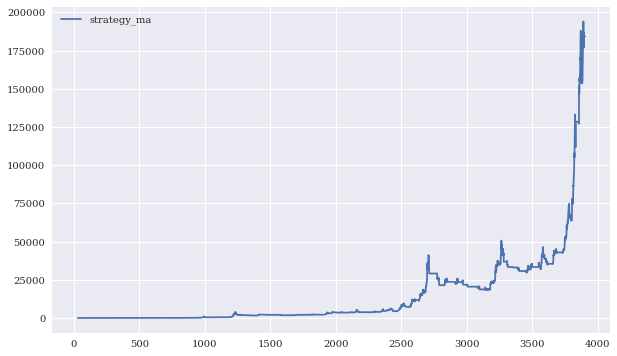

In [166]:
df['position']=np.array(direction)
df['strategy_ma']=df['position'].shift(1)*df['return']
df[['strategy_ma']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [34]:
df_2=df[df['amout']>10000]

In [35]:
df_2

,time,open,high,low,close,amout,market_value,return,SMA1,SMA2,Position,Strategy_MA
61,2020-05-30,0.199800,0.212700,0.199800,0.212700,573000.0,--,0.063066,0.194020,0.188888,1,0.063066
62,2020-05-31,0.212600,0.246500,0.211700,0.239900,756300.0,--,0.120339,0.198340,0.189250,1,0.120339
63,2020-06-01,0.240800,0.282200,0.240000,0.269000,948900.0,--,0.114489,0.208020,0.189878,1,0.114489
64,2020-06-02,0.264700,0.276900,0.264700,0.270400,895100.0,--,0.005191,0.223200,0.190998,1,0.005191
65,2020-06-03,0.270500,0.277400,0.260900,0.262800,809600.0,--,-0.028509,0.238340,0.192135,1,-0.028509
...,...,...,...,...,...,...,...,...,...,...,...,...
357,2021-03-25,0.139500,0.139600,0.089705,0.089705,1398700.0,--,-0.441538,0.076271,0.022815,1,-0.441538
358,2021-03-26,0.089705,0.095827,0.089705,0.095827,1505300.0,--,0.066018,0.091413,0.023755,1,0.066018
359,2021-03-27,0.095827,0.099377,0.095827,0.099377,1555700.0,--,0.036376,0.106620,0.024797,1,0.036376
360,2021-03-28,0.099377,0.099377,0.097654,0.097654,1259000.0,--,-0.017490,0.113522,0.025953,1,-0.017490


In [122]:
results=pd.DataFrame()
data=pd.read_excel("gec.xlsx")
df=data.copy()
df.columns=['time','open','high','low','close','amout','market_value']
df['return']=np.log(df['close']/df['close'].shift())
df['SMA1']=df['close'].shift().rolling(5).mean()
df['SMA2']=df['close'].shift().rolling(20).mean()
df.dropna(inplace=True)
df['Position']=np.where((df['SMA1']>df['SMA2']),1,-1)
df['Strategy_MA']=df['Position'].shift(1)*df['return']
df.dropna(inplace=True)
perf=np.exp(df[['return','Strategy_MA']].sum())

<AxesSubplot:>

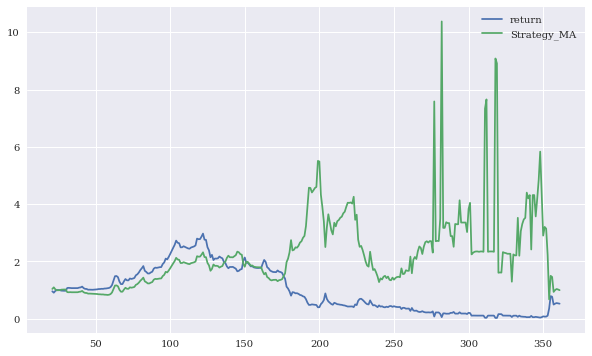

In [123]:
df[['return','Strategy_MA']].cumsum().apply(np.exp).plot(figsize=(10,6))

# ATR

In [118]:
import talib

In [197]:
df['atr']=talib.ATR(df['high'],df['low'],df['close'],timeperiod=14)

In [198]:
df

,time,open,close,low,high,atr
0,2017-10-26 00:00:00,5712.00,5875.91,5400.00,5990.00,NaN
1,2017-10-27 00:00:00,5876.00,5739.00,5669.93,5948.52,NaN
2,2017-10-28 00:00:00,5743.43,5658.62,5637.63,5791.80,NaN
3,2017-10-29 00:00:00,5656.46,5936.95,5648.03,5977.30,NaN
4,2017-10-30 00:00:00,5940.77,6076.90,5875.00,6215.80,NaN
...,...,...,...,...,...,...
1243,2021-03-22 00:00:00,57160.75,57080.05,56272.26,58452.29,3778.198589
1244,2021-03-23 00:00:00,57080.04,55169.17,53000.00,57190.00,3807.612975
1245,2021-03-24 00:00:00,55169.18,56301.43,53525.80,57188.00,3797.226334
1246,2021-03-25 00:00:00,56301.45,50988.85,50465.00,56440.73,3952.833739


In [121]:
df.dropna(inplace=True)

In [122]:
df['position']=np.where((df['close']-df['close'].shift()-df['atr'])>0,1,-1)

In [123]:
df['strategy_atr']=df['position'].shift()*df['return']

<AxesSubplot:>

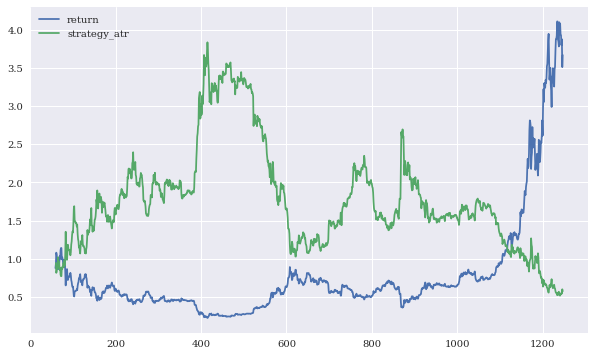

In [124]:
df[['return','strategy_atr']].cumsum().apply(np.exp).plot(figsize=(10,6))

# CCI

time
2021-03-22     12.305182
2021-03-23   -104.626415
2021-03-24    -79.603196
2021-03-25   -187.378762
2021-03-26   -143.906267
dtype: float64


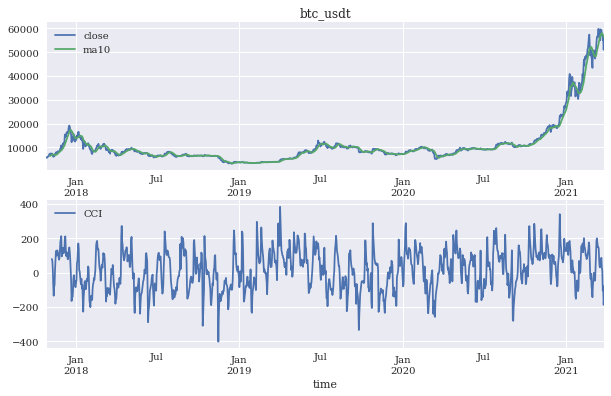

In [199]:
df['ma10'] = df['close'].rolling(window=10).mean()
df.index = pd.to_datetime(df.time)
#  baike.baidu.com/item/CCI顺势指标
cci = talib.CCI(df.high, df.low, df.close, timeperiod=14)
print(cci[-5:])
 
# 画股票收盘价图
fig,axes = plt.subplots(2,1)
df[['close', 'ma10']].plot(ax=axes[0], grid=True, title="btc_usdt",figsize=(10,6))
# 画 cci 曲线图
cci.plot(ax=axes[1], grid=True, label='CCI',figsize=(10,6))
plt.legend(loc='best', shadow=True)
plt.show()


TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]